In the real world, the data professional workflow includes a lot of trial and error.

The purpose of this challenge is to try several APIs and gain experience by practicing the various subtleties that each one will present.

If we get stuck, we might try one or more of the following:

* First, check the API's documentation. If something is possible, it should be included there.
* Try to follow the steps we've practiced in last file.

Here is the basic code snippet to query an API and get the desired content.

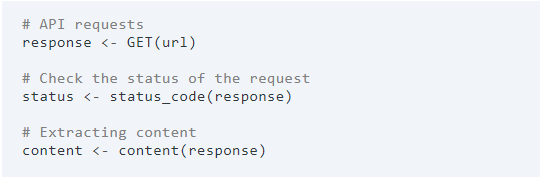

This challenge will require a lot of experimentation to build or modify functions. Feel free to work out the body of the function line by line on its own, and then wrap it in a function when we've got all of the pieces together and working.

**Brief API description**: [Official Joke API](https://github.com/15Dkatz/official_joke_api) contains jokes shared by joke-loving coders around the world.

**Our goal**: we want to extract a random programming joke.

Here is an example of the expected output:

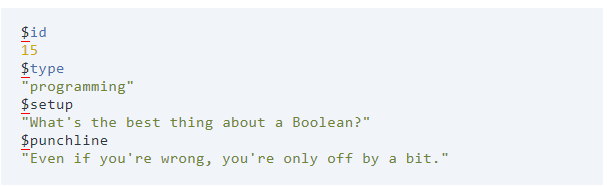

**Task**

* Search the [**API documentation**](https://github.com/15Dkatz/official_joke_api) **to determine the endpoint** for a random programming joke.

* Query the API to request a random programming joke and get the status code of our request.

* Extract the content from the API response and display it to see the joke.

**Answer**

`library(httr)
response <- GET("https://official-joke-api.appspot.com/jokes/programming/random")
response`

`status <- status_code(response)
status`

`the_joke <- content(response)
the_joke`

**Brief API description**: [Open Skills API](https://github.com/workforce-data-initiative/skills-api/wiki/API-Overview) is a standard data store for canonical and emerging skills, knowledge, abilities, tools, technolgies, and how they relate to jobs.

**Our goal**: we want to extract a job standard title. This job identifier (`uuid`) is `8fd068c8d9be73abfa678856177b6c40`.

Here are the first few lines of the expected output:

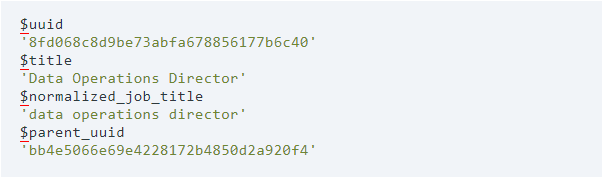

**Task**

* Search the [**API documentation**](https://github.com/workforce-data-initiative/skills-api/wiki/API-Overview) **to determine the URL** for a specific job standard title (we have the `uuid` of the job we want to extract).
    * Edit this URL for the ID equal to `8fd068c8d9be73abfa678856177b6c40`.

* Use this URL to query the API to request the selected job description and get our request's **status code**.

* Extract the content from the API response and display it to see this position.


**Answer**

`response <- GET("http://api.dataatwork.org/v1/jobs/8fd068c8d9be73abfa678856177b6c40")
response`

`status <- status_code(response)
status`

`the_job <- httr::content(response)
the_job`

**Brief API description**: [Meetup API](https://www.meetup.com/meetup_api/) — finding and interacting with meetup platforms.

**Our goal**: we want to extract the data analytics meetups and convert the output into a dataframe. The output dataframe only contains `id`, `name`, and `description` columns.

Here are the first two rows of the expected output:

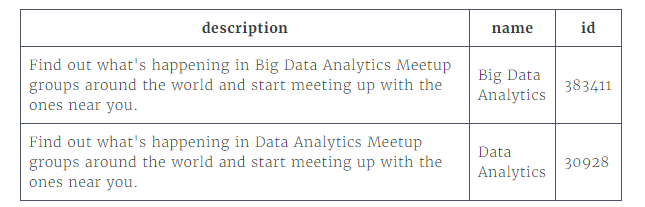

Here is the `wb_api_json_get_df()` function as a reminder. Feel free to modify it for our purposes. Mainly, we should specify the correct URL and adjust how we get the dataframe. Thanks to the optional parameter `queries`, we can specify parameters that we will find in the documentation for this function. If we're stuck, feel free to print out each step inside the function to see where the problem comes from.

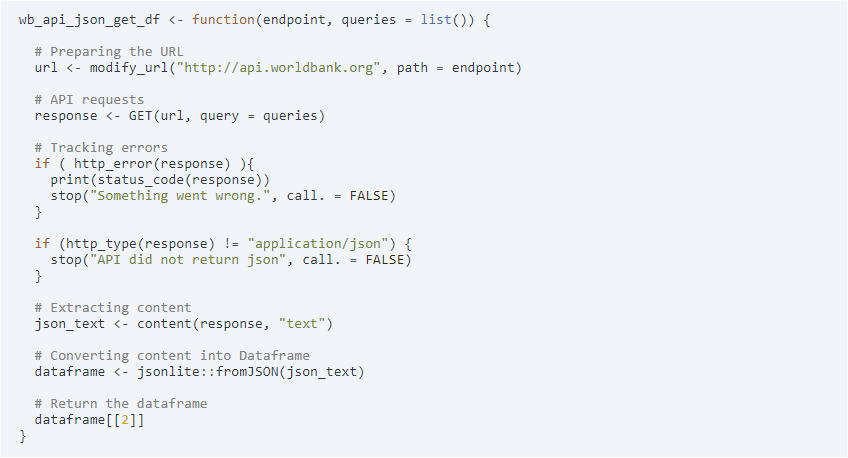

**Task**

1. Check the [**API documentation**](https://www.meetup.com/meetup_api/).

    * Find how to filter meetup's topics containing `"data analytics"`.
    * Find how to specify that we only want the `id`, `name`, and `description` columns (in that order).

2. Query the API to request the data analytics meetups data.

    * Don't forget to specify the desired columns.
    * Convert the API response's content into a dataframe.
    
3. Display the dataframe

**Answer**

`data_analytics_meetups <- meetup_api_json_get_df("find/topics", list(query = "data analytics",
                                                                     only = "id,name,description"))`
`data_analytics_meetups`

**Brief API description**: [World Bank APIs](https://datahelpdesk.worldbank.org/knowledgebase/articles/889386-developer-information-overview) provide access to several datasets and time series covering multiples topics (agriculture, economy, health, etc.). We have already worked on some of these APIs in the last files.


Here, we want to look at poverty indicators, particularly the real agricultural GDP per capita growth rate (%) from Africa Development Indicators. Its code is `NV.AGR.PCAP.KD.ZG`.

**Our goal**: we want to extract this indicator data from `1989` to `2000` in JSON format and convert it into a dataframe. Then we can visualize the result to see the trend of this indicator.

Here is the expected output:

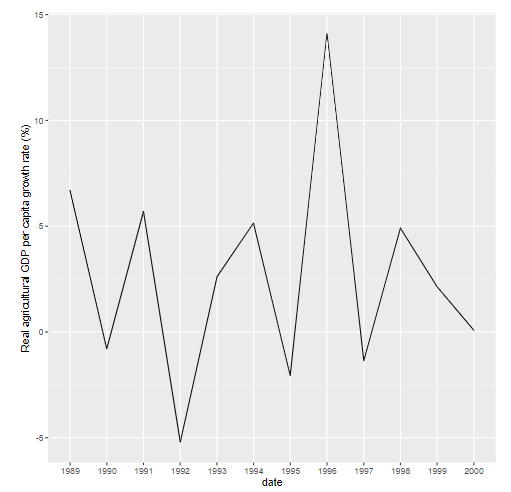


**Task**

1. Check the [**API basic call structures**](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures).

    * Find how to query data for a specific country.
    * Find how to query data for a specific indicator.
    * Find how to extract data between two years.
    * Find how to specify that the output should be in the JSON format.

2. Query the API to request the `afr` country data for the `NV.AGR.PCAP.KD.ZG` indicator between `1989` and `2000`.

    * Don't forget to specify the output format.
    * Convert the API response's content into a dataframe.

3. Use the `str()` function to see the structure of the dataframe.

4. Use the `ggplot()` function to create a line plot to see the real agricultural GDP per capita growth rate trend from `1989` to `2000`.

**Answer**

`# We use the existing `wb_api_json_get_df()` function as is`.

`wb_poverty_level <- wb_api_json_get_df("v2/country/afr/indicator/NV.AGR.PCAP.KD.ZG", list(format = "json", date="1989:2000"))`

`str(wb_poverty_level)`

`library(ggplot2)
ggplot(data = wb_poverty_level, aes(x = date, y = value, group = 1)) + geom_line() + ylab("Real agricultural GDP per capita growth rate (%)")`

**Brief API description**: [Trefle API](https://docs.trefle.io/docs/guides/getting-started/) provides plant information.

**Our goal**: we want to authenticate to the API and extract the `common_name` of the oldest (top 20) discovered plants worldwide.

The result obtained after parsing the JSON data to a dataframe is a list instead of a dataframe. We will need to extract the `common_name` vector from it.

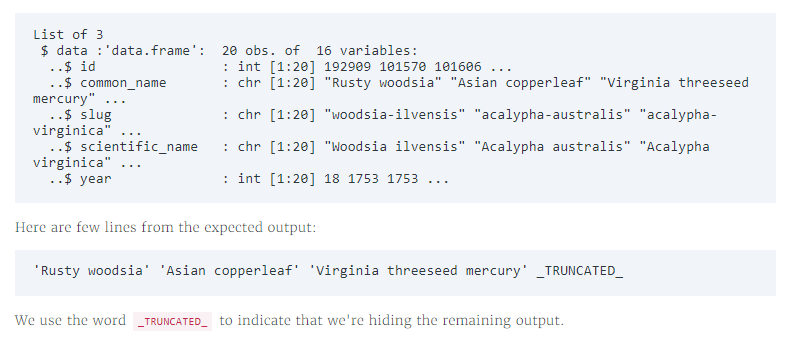

We will need to create an account to get an access token. Follow the [steps on the documentation](https://docs.trefle.io/docs/guides/getting-started/#what-you-need) for that. When we're connected to our account, we can access our token under `"my account"` button.

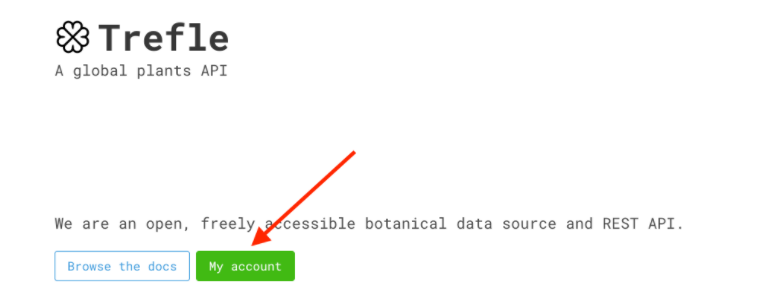

We recommend to build a custom function piece-by-piece to solve this problem. We would have to print out the result from the parsed JSON and then figure out how to extract the desired data.

**Task**

1. Check the [**API documentation**](https://docs.trefle.io/docs/guides/getting-started/).

    * Look at the [sorting](https://docs.trefle.io/docs/guides/sorting/) and [pagination](https://docs.trefle.io/docs/guides/pagination/) sections.
    * Be aware that even if the pagination documentation states the API outputs 30 items per page, it actually only outputs 20 items.

2. Query the API to request the oldest (top 20) discovered plants.

    * Don't forget to specify [our API key](https://trefle.io/users/sign_up).
    * Convert the API response's content into a dataframe.
3. Use the `str()` function to see the structure of the dataframe.

**Answer**

`top_20_plants_df <- trefle_api_json_get_df("api/v1/plants?order[year]=asc", list(token = your_key))`

`top_20_plants_df`

**Brief API description**: [Climate Data API](https://datahelpdesk.worldbank.org/knowledgebase/articles/889386-developer-information-overview) provides access to past, present, and future climate data time series.

We are interested in general circulation models (GCMs). GCMs are climate models that consider vvarious fluid motion variables such as earth surface pressure, temperature and water vapor, and radiation. These models also include time to forecast the past, present, and future of climate changes.

**Our goal**: we want to compare two general circulation models (GCM) for future temperatures in Nigeria. To do so, we first want to extract the data for both models and then create line plots to visualize them.

Here is the expected output:

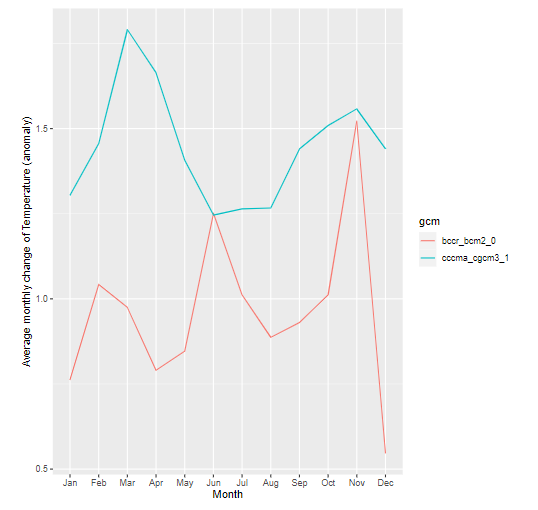

This illustration shows that the `bccr_bcm2_0` model is more optimistic than `cccma_cgcm3_1` because the monthly anomaly levels predicted by `bccr_bcm2_0` are less than those predicted by `cccma_cgcm3_1`. We can also notice that these two models agree (show the same values) only in a few months over the whole years.

**Task**

1. Search the [**API documentation**](https://datahelpdesk.worldbank.org/knowledgebase/articles/902061-climate-data-api) for how to build expected endpoints with the following information.

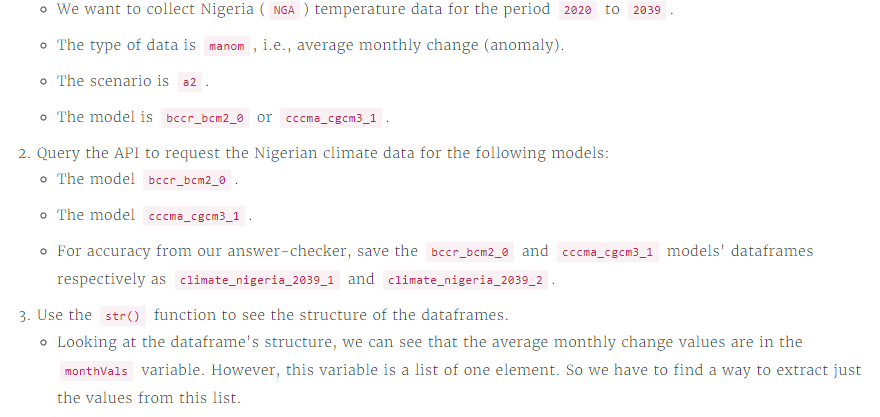

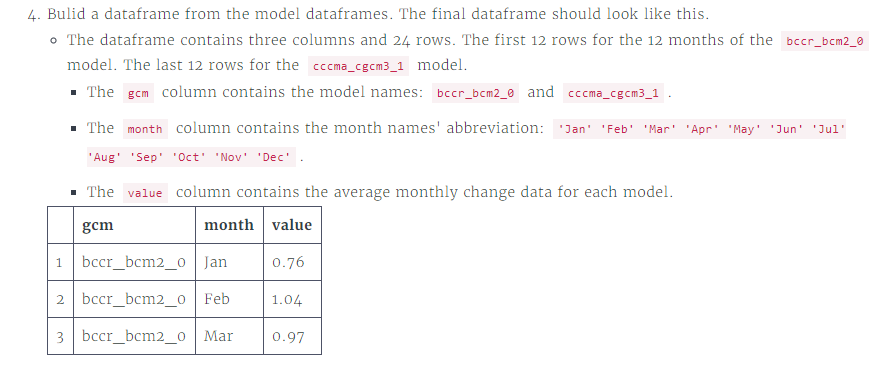

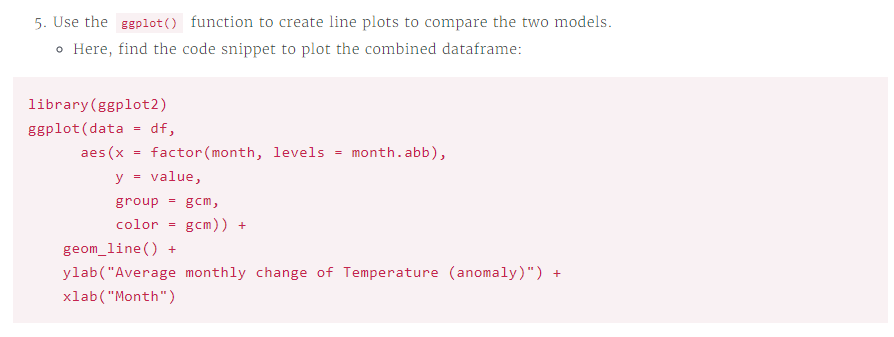

**Answer**

`climate_nigeria_2039_1 <- climate_api_json_get_df("climateweb/rest/v1/country/manom/bccr_bcm2_0/a2/tas/2020/2039/NGA")
climate_nigeria_2039_2 <- climate_api_json_get_df("climateweb/rest/v1/country/manom/cccma_cgcm3_1/a2/tas/2020/2039/NGA")`

`str(climate_nigeria_2039_1)
str(climate_nigeria_2039_2)`

`gcm <- c(rep("bccr_bcm2_0", 12), rep("cccma_cgcm3_1", 12))
month <- rep(month.abb, 2)
value <- c(climate_nigeria_2039_1$monthVals[[1]], 
           climate_nigeria_2039_2$monthVals[[1]])`

`df <- tibble::tibble("gcm" = gcm, "month" = month, "value" = value)
df`

`library(ggplot2)
ggplot(data = df,
      aes(x = factor(month, levels = month.abb), y = value, group = gcm, color = gcm)) + geom_line() + ylab("Average monthly change of Temperature (anomaly)") + xlab("Month")`

In this challenge, we learned how to deal with some problems we might encounter working with an API in the real world.